In [1]:
from TaskAutomationServer import TaskAutomationServer
import cv2
import matplotlib.pyplot as plt

import matplotlib.patches as patches

2025-05-15 19:58:51.233635: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-15 19:58:51.419714: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747357131.521282    9402 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747357131.553523    9402 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747357131.723323    9402 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Acción reuqerida: Abre docker
Coordenadas recibidas: 50 334


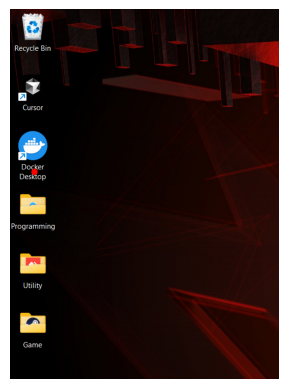

In [7]:
import base64
import requests
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def mostrar_imagen_con_punto(ruta_imagen, x, y, color='red', radio=5):
    img = cv2.imread(ruta_imagen)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    fig, ax = plt.subplots()
    ax.imshow(img)
    punto = patches.Circle((x, y), radius=radio, color=color)
    ax.add_patch(punto)
    ax.axis('off')
    plt.show()

ip = "localhost"
# Datos
image_path = "pruebas/image1.png"
action = "Abre docker"
url = f"http://{ip}:5000/predict"

# Leer y codificar imagen en Base64
with open(image_path, "rb") as f:
    img_b64 = base64.b64encode(f.read()).decode("utf-8")

# Enviar petición
response = requests.post(url, json={"action": action, "image": img_b64})

# Procesar respuesta
if response.ok:
    data = response.json()
    x, y = data['x'], data['y']
    print("Acción reuqerida:", action)
    print("Coordenadas recibidas:", x, y)
    mostrar_imagen_con_punto(image_path, x, y)
else:
    print("Error:", response.status_code, response.json())
